## 1. 
**(a) Load the dataset iris by typing data(iris).**

In [1]:
# Solution:
data(iris)

**(b) Load the packages rpart and rpart.plot. Use the command
iristree = rpart(Species ~ .,data=iris, method="class")to construct a decision tree model for classifying iris flowers based
on some input variables in the dataset iris. The target (response)
variable is Species.<br>
In this exercise, we’re concentrating on learning different methods
to assessing models. We’re not discussing the data mining methods
behind the modeling (such as understanding the building of a decision
tree). This will come later.**

In [2]:
# Solution:
library(rpart)
iristree = rpart(Species ~ .,data=iris, method="class")

**(c) Divide the sample into a training data set with 2/3 of the observations
and the rest in a test data set.**

In [3]:
# Solution:
n = nrow(iris)
set.seed(42)
train.id = sample(n, size = 2/3*n)
test.id = setdiff(1:n, train.id)

**(d) Create a standard decision tree for the training data set.**

In [4]:
# Solution:
traintree = rpart(Species ~ .,data=iris, method="class",
subset=train.id)

**(e) Make predictions with the decision tree model for the test data set.**

In [5]:
# Solution:
pred=predict(traintree, iris[-train.id,], type="class")

**(f) Take a look at the predicted values.**

In [6]:
# Solution:
head(pred)

7     11     12     14     19     23 
setosa setosa setosa setosa setosa setosa 
Levels: setosa versicolor virginica

**(g) Construct the confusion matrix. Interpretation?**

In [7]:
# Solution:
table(pred, iris[-train.id, "Species"])

            
pred         setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         16         1
  virginica       0          1        19

## 2. Medical researchers want to explore the relationship between patient age and the presence (disease=1) or absence (disease=0) of a particular disease. Data are collected for 20 patients and stored in the data set disease.

**(a) Read the data set disease into R, for example with the command
read.csv.**

In [8]:
# Solution
ff=read.csv(file="data/disease.txt", head=TRUE, sep=",")
ff

Age,Disease
<int>,<int>
25,0
29,0
30,0
31,0
32,0
41,0
41,0
42,0
44,1


**(b) Use a decision tree (analogously to the previous exercise) to predict
the class of the target variable for each of the 20 patients. Don’t
divide the data into training and validation data.**

In [9]:
# Solution:
diseasetree = rpart(Disease ~ .,data=ff, method="class")
pred=predict(diseasetree, ff, type="class")

**(c) Take a look at the predicted values.**

In [10]:
# Solution
pred

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 
 0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1 
Levels: 0 1

**(d) Construct the confusion matrix. Interpretation?**

In [11]:
# Solution:
table(pred, ff[,"Disease"])

    
pred 0 1
   0 8 0
   1 5 7

**(e) Construct a decision tree again, but this time predict the probability
of the target levels instead of the class. Take a look at the predicted
values.**

In [12]:
# Solution:
iseasetree = rpart(Disease ~ .,data=ff, method="class")
p2 = predict(diseasetree, ff, type="prob")
p2

,0,1
1,1.0000000,0.0000000
2,1.0000000,0.0000000
3,1.0000000,0.0000000
4,1.0000000,0.0000000
5,1.0000000,0.0000000
6,1.0000000,0.0000000
7,1.0000000,0.0000000
8,1.0000000,0.0000000
9,0.4166667,0.5833333
10,0.4166667,0.5833333


**(f) Construct a ROC curve.**

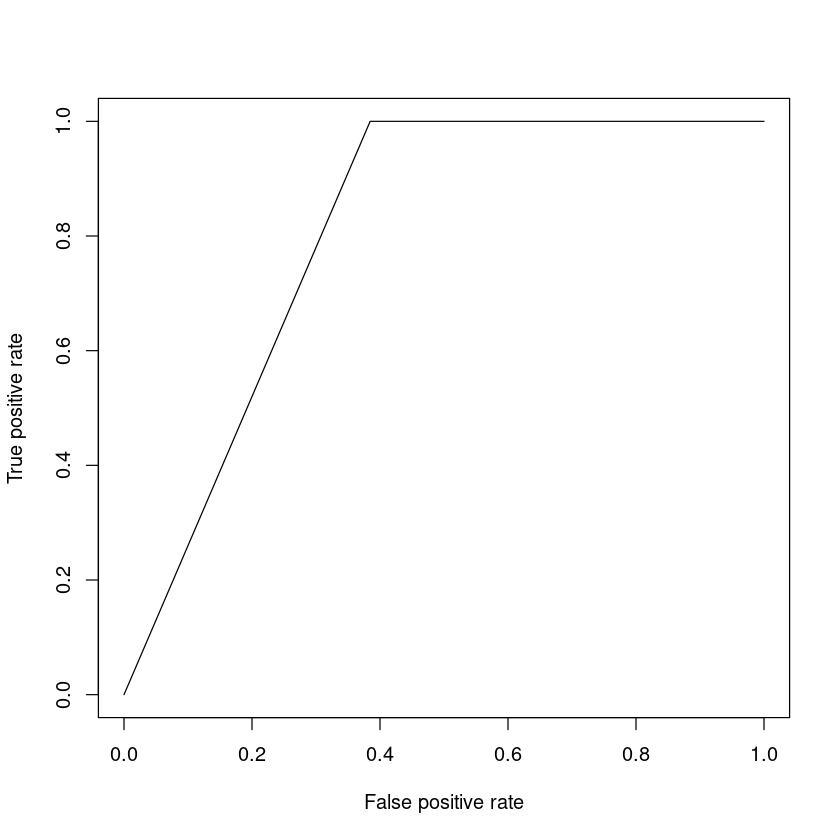

In [13]:
# Solution:
library(ROCR)
pr3=p2[,2]
pr = prediction(pr3, ff$Disease)
perf = performance(pr,"tpr","fpr")
plot(perf)

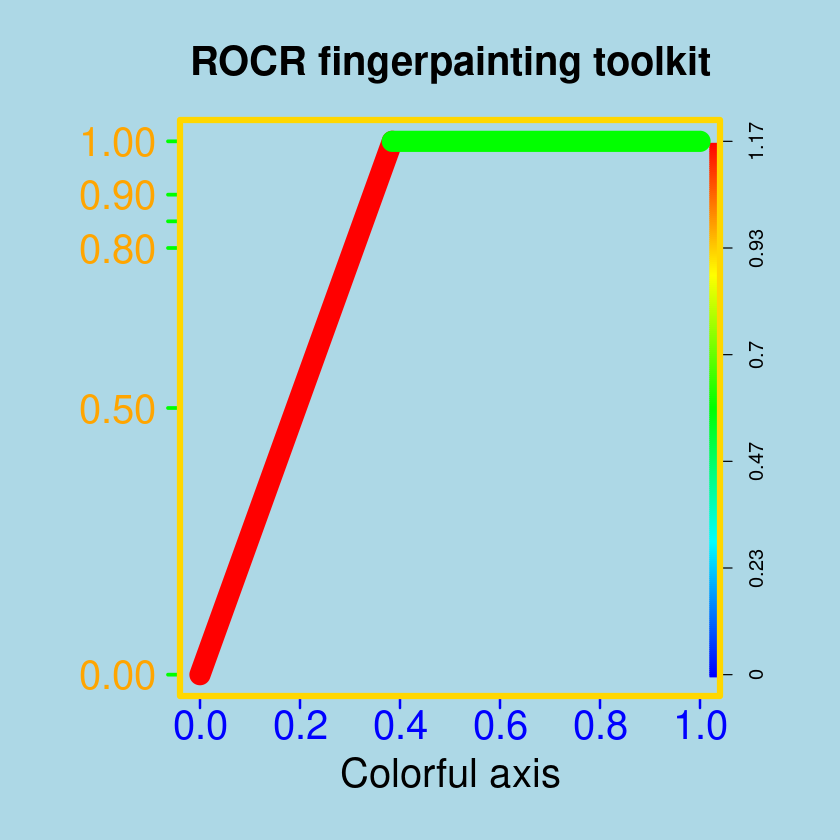

In [14]:
# Colorful output
par(bg="lightblue", mai=c(1.2,1.5,1,1))
plot(perf, main="ROCR fingerpainting toolkit", colorize=TRUE,
xlab="Colorful axis",ylab="", box.lty=7, box.lwd=5,
box.col="gold", lwd=17, colorkey.relwidth=0.5,
xaxis.cex.axis=2,xaxis.col="blue",
xaxis.col.axis="blue", yaxis.col="green", yaxis.cex.axis=2,
yaxis.at=c(0,0.5,0.8,0.85,0.9,1),
yaxis.las=1, xaxis.lwd=2, yaxis.lwd=3,yaxis.col.axis="orange",
cex.lab=2, cex.main=2)

**(g) Calculate the area under the ROC curve and interpret the result.**

In [15]:
# Solution:
perff=performance(pr,"auc")
AUC=as.numeric(perff@y.values)
AUC

[1] 0.8076923